# INTRODUCCIÓN

La puntualidad de los vuelos es un factor crítico en el transporte aéreo, ya que impacta directamente en la experiencia de los pasajeros, los costos operativos de las aerolíneas y la planificación logística de aeropuertos. Retrasos frecuentes generan insatisfacción, pérdidas económicas y efectos en cadena como conexiones perdidas o reprogramaciones.

En este contexto, el proyecto FlightOnTime tiene como objetivo desarrollar una solución predictiva que permita estimar, antes del despegue, si un vuelo será puntual o presentará retraso. Para ello, el equipo de Data Science utiliza datos históricos de vuelos comerciales en Estados Unidos, que incluyen información como aerolínea, aeropuertos de origen y destino, fechas, horarios y variables operacionales.

Este notebook corresponde a la etapa de Exploración y Análisis de Datos (EDA). Su propósito es comprender la estructura del dataset, evaluar su calidad, identificar patrones relevantes y sentar las bases para la posterior creación de variables y el entrenamiento de un modelo de clasificación binaria (Puntual / Retrasado). El análisis se realiza con un enfoque práctico y orientado a la construcción de un MVP funcional, acorde al alcance y al perfil del hackathon.

##FUENTE DE DATOS

El dataset utilizado corresponde a registros históricos de vuelos comerciales en Estados Unidos y se obtiene desde la plataforma Kaggle, una fuente pública y ampliamente utilizada en proyectos de ciencia de datos. Este conjunto de datos contiene información operacional de cada vuelo, incluyendo fechas, horarios programados y reales, aerolínea, aeropuerto de origen y destino, distancia, cancelaciones y distintos tipos de retraso.

Debido al tamaño del dataset original (del orden de millones de registros), este no se versiona directamente en el repositorio del proyecto. En su lugar, el notebook está preparado para descargar el dataset directamente desde Kaggle utilizando su API oficial. Esta práctica permite mantener el repositorio liviano, reproducible y alineado con buenas prácticas de seguridad, ya que las credenciales personales necesarias para el acceso no forman parte del código.

A partir de este dataset completo se realiza el análisis exploratorio y, posteriormente, se genera un subconjunto de datos adecuado para el entrenamiento del modelo del MVP.

##[DATASET KAGGLE](https://www.kaggle.com/datasets/heemalichaudhari/airlines-delay?select=DelayedFlights.csv)

#ANÁLISIS EXPLORATORIO DE DATOS (EDA)

##IMPORTAR DATASET

In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import pandas as pd

In [ ]:
import os
# Requiere configurar la variable de entorno KAGGLE_API_TOKEN
os.environ["KAGGLE_API_TOKEN"] = ""

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "heemalichaudhari/airlines-delay",
    "DelayedFlights.csv"
)

df.shape


100%|██████████| 64.9M/64.9M [00:00<00:00, 76.8MB/s]

Extracting zip of DelayedFlights.csv...


(1936758, 30)

In [ ]:
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

##DESCRIPCIÓN DEL DATASET

El dataset utilizado contiene 1.936.758 registros de vuelos comerciales en Estados Unidos y 30 variables asociadas a información temporal, operacional y de retrasos. Cada fila representa un vuelo individual, identificado por su fecha, aerolínea, aeropuerto de origen y destino, y horarios programados y reales.

Las variables pueden agruparse en las siguientes categorías:

* **Variables temporales**

  Incluyen información sobre la fecha y el momento del vuelo:
  Year, Month, DayofMonth, DayOfWeek
  CRSDepTime, CRSArrTime (horarios programados)
  DepTime, ArrTime (horarios reales).

Estas variables permiten capturar patrones asociados a estacionalidad, día de la semana y franjas horarias.

* **Variables de identificación del vuelo**

  Describen la operación y el trayecto:

  UniqueCarrier (aerolínea)
  FlightNum
  TailNum
  Origin, Dest
  Distance

Estas variables son clave para identificar diferencias de desempeño entre aerolíneas, rutas y aeropuertos.

* **Variables de duración**

  Relacionadas con el tiempo del vuelo:

  CRSElapsedTime
  ActualElapsedTime
  AirTime
  TaxiIn, TaxiOut

Permiten analizar discrepancias entre tiempos planificados y reales.

* **Variables de retraso**

  Miden directamente el desempeño en puntualidad:

  ArrDelay, DepDelay
  CarrierDelay
  WeatherDelay
  NASDelay
  SecurityDelay
  LateAircraftDelay

Estas variables explican por qué ocurre un retraso, incluyendo causas climáticas, operacionales y de seguridad.

* **Variables de estado del vuelo**

  Indican eventos excepcionales:
  Cancelled
  CancellationCode
  Diverted

Estas variables permiten identificar vuelos que no siguen el flujo normal de operación.

* *Columna técnica*

  Unnamed: 0: índice proveniente del archivo original, sin valor analítico directo.

##CONSIDERACIONES INICIALES PARA EL ANÁLISIS

El dataset contiene tanto variables disponibles antes del despegue como variables que solo se conocen después de la operación.

Para el modelado del MVP, solo se utilizarán variables que pueden ser provistas por el backend antes del vuelo.

Las variables de retraso detallado y clima se analizarán en el EDA para entender el fenómeno, aunque no todas formarán parte del modelo final.

##TRATAMIENTO DE VALORES NULOS: CRITERIO Y DESICIÓN



El dataset presenta valores nulos en distintas columnas, pero no todos los nulos tienen el mismo significado ni el mismo impacto en el análisis y el modelado. Por esta razón, el tratamiento de valores faltantes se define en función del rol de cada variable y del objetivo del proyecto.

###Variables críticas para el modelado (se exige valor)

  Las siguientes variables son fundamentales para:
  definir la variable objetivo
  construir las features del MVP
  cumplir el contrato con el backend

Criterio:
Si alguna de estas variables está ausente, el registro no es utilizable para el modelo y se elimina.

Variables:

* ArrDelay (necesaria para definir si el vuelo estuvo retrasado)
* CRSDepTime
* DayOfWeek
* UniqueCarrier
* Origin
* Dest
* Distance

Decisión:
Se eliminan los registros con valores nulos en cualquiera de estas columnas.

###Variables relacionadas con vuelos cancelados o desviados

Variables como:

* DepTime, ArrTime
* ActualElapsedTime, AirTime

###Variables de retraso (CarrierDelay, WeatherDelay, etc.)
suelen ser nulas cuando:

  * El vuelo fue cancelado
  * El vuelo fue desviado

Criterio:
Estos vuelos no representan un caso válido para el objetivo del MVP (predecir retraso en vuelos que efectivamente despegan).

Decisión:
Se excluyen los vuelos:

  * Cancelados (Cancelled = 1)
  * Desviados (Diverted = 1)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
CRSDepTime,0
ArrTime,7110
CRSArrTime,0
UniqueCarrier,0


###Análisis de valores nulos

La revisión de valores faltantes muestra que el dataset presenta nulos concentrados en variables específicas, principalmente asociadas a vuelos no operativos o a desgloses de causa de retraso.

####Variables sin valores nulos

  La mayoría de las variables clave no presentan valores faltantes, entre ellas:
  * variables temporales (Year, Month, DayOfWeek)
  * variables operacionales (UniqueCarrier, Origin, Dest, Distance)
  * variables necesarias para el modelo MVP

Conclusión:
Estas columnas no requieren ningún tratamiento adicional.

####Nulos asociados a la operación real del vuelo

  Las siguientes variables presentan una cantidad moderada de nulos:

  * ArrTime (7.110)
  * ActualElapsedTime (8.387)
  * AirTime (8.387)
  * ArrDelay (8.387)
  * TaxiIn (7.110)
  * TaxiOut (455)
  * CRSElapsedTime (198)

Estos nulos corresponden principalmente a vuelos que:

* Fueron cancelados
* O no completaron su operación normal

Esto es consistente con el dominio del problema: si un vuelo no despega o no aterriza, no existen tiempos reales ni retrasos medibles.

Decisión:
* Se excluyen del análisis y del modelado los vuelos cancelados o no operativos, ya que el objetivo del proyecto es predecir retrasos en vuelos que efectivamente despegan.

####Nulos en columnas de causa de retraso

  Las columnas:

  * CarrierDelay
  * WeatherDelay
  * NASDelay
  * SecurityDelay
  * LateAircraftDelay

Presentan 689.270 valores nulos cada una.

Este comportamiento es esperado:
  * Estas variables solo se completan cuando el vuelo presenta un retraso atribuible a esa causa
  * Vuelos puntuales o con retrasos menores no reportan estos valores

Decisión:
  * No se imputan ni se utilizan para eliminar registros.
  * Estas variables se mantienen exclusivamente para análisis exploratorio y comprensión del fenómeno, no para el modelo MVP.

####Casos puntuales y columnas técnicas

TailNum presenta solo 5 valores nulos, lo que no afecta el análisis general.

Unnamed: 0 corresponde a un índice del archivo original y no aporta información analítica.

Decisión:
  * Unnamed: 0 se elimina.
  * TailNum no se utiliza en el MVP, por lo que sus nulos no afectan el flujo.

####**Resumen de decisiones sobre valores nulos**

* ✔ Se eliminan vuelos no operativos (cancelados / sin tiempos reales)
* ✔ No se imputan valores de retraso por causa
* ✔ Se conservan todas las variables necesarias para el modelo
* ✔ Las decisiones se basan en lógica de negocio, no en criterios arbitrarios.

In [ ]:
df.shape

(1936758, 30)

In [ ]:
#Elimina Columna Técnica
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df.shape

(1936758, 29)

In [ ]:
#Elimina vuelo no operativo
df = df[df["Cancelled"] == 0]
df.shape

(1936125, 29)

In [ ]:
#Elimina vuelos cancelados o no operativos
df = df.dropna(subset=[
    "ArrDelay",
    "ActualElapsedTime",
    "AirTime"
])
df.shape

(1928371, 29)

In [ ]:
#Recuento
df.isna().sum().sort_values(ascending=False)

,0
CarrierDelay,680883
LateAircraftDelay,680883
SecurityDelay,680883
NASDelay,680883
WeatherDelay,680883
TailNum,3
DepTime,0
CRSArrTime,0
CRSDepTime,0
Month,0


Columnas:

* CarrierDelay
* WeatherDelay
* NASDelay
* SecurityDelay
* LateAircraftDelay

Estos nulos no significan datos faltantes.

Significan:

* Ese vuelo no tuvo retraso atribuible a esa causa

Es decir:

* Si el vuelo no se retrasó, estas columnas quedan vacías
* Si el vuelo se retrasó, solo una o algunas causas se informan

**Decisión**

* No imputar causas de retraso
* No eliminarlas
* No usarlas en el modelo MVP

**Justificación**

* No están disponibles antes del despegue
* Son explicativas a posteriori
* Se usan solo para análisis descriptivo.

###Análisis de duplicados (definición de vuelo único)

Definición operativa

Para el análisis, se define un vuelo único como aquel que comparte simultáneamente:

  * Año, mes y día
  * Aerolínea
  * Número de vuelo
  * Aeropuerto de origen y destino
  * Hora programada de salida y llegada

Esto se traduce en el siguiente subconjunto de columnas:

In [ ]:
#Define Vuelo único
subset_cols = [
    "Year",
    "Month",
    "DayofMonth",
    "UniqueCarrier",
    "FlightNum",
    "Origin",
    "Dest",
    "CRSDepTime",
    "CRSArrTime"
]

In [ ]:
#Cantidad de vuelos duplicados según definición de vuelo único
duplicated_flights = df.duplicated(subset=subset_cols).sum()
duplicated_flights

np.int64(2)

In [ ]:
df.shape

(1928371, 29)

In [ ]:
#Elimina vuelos duplicados
df = df.drop_duplicates(subset=subset_cols)
df.shape


(1928369, 29)

###Conclusión del análisis de duplicados

Se realizó un análisis de registros duplicados definiendo un vuelo único a partir de variables operativas previas al despegue.
El análisis detectó únicamente 2 registros duplicados, los cuales fueron eliminados.
Dado el tamaño del dataset, la presencia de duplicados no representa un problema estructural y no afecta la validez del análisis ni del modelado.

##DEFINICIÓN DEL TARGET

Se define como vuelo retrasado aquel cuya demora en la llegada (ArrDelay) es superior a 15 minutos, criterio estándar utilizado en la industria aérea.

Variable objetivo:

* is_delayed = 1 → vuelo retrasado

* is_delayed = 0 → vuelo puntual

In [ ]:
#Define vuelo retrasado y proporción
df["is_delayed"] = (df["ArrDelay"] > 15).astype(int)
df["is_delayed"].value_counts(normalize=True)

,proportion
is_delayed,
1,0.630071
0,0.369929


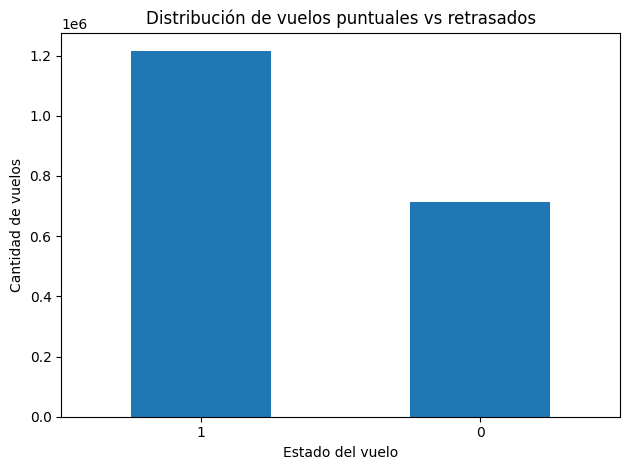

In [ ]:
import matplotlib.pyplot as plt

#Gráfico
ax = df["is_delayed"].value_counts().plot(
    kind="bar",
    title="Distribución de vuelos puntuales vs retrasados"
)

#Etiquetas del eje X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Etiquetas de ejes (opcional)
ax.set_xlabel("Estado del vuelo")
ax.set_ylabel("Cantidad de vuelos")

plt.tight_layout()
plt.show()

###Interpretación

La variable objetivo presenta un desbalance moderado, con una mayor proporción de vuelos retrasados.
Este comportamiento puede explicarse por el criterio utilizado para definir retraso (más de 15 minutos), el cual es sensible a pequeñas demoras acumuladas durante la operación aérea.

###Validación estadística del target

In [ ]:
df.groupby("is_delayed")["ArrDelay"].agg(["mean", "median", "min", "max"])


,mean,median,min,max
is_delayed,,,,
0,4.078102,5.0,-109.0,15.0
1,64.582015,44.0,16.0,2461.0


* Vuelos NO retrasados (is_delayed = 0)

  * Media: 4.1 min
  * Mediana: 5 min
  * Rango: –109 a 15 min

* Incluye llegadas anticipadas (valores negativos) y retrasos leves dentro del umbral.

  * Vuelos retrasados (is_delayed = 1)
  * Media: 64.6 min
  * Mediana: 44 min
  * Rango: 16 a 2461 min

La separación entre clases es consistente y coherente con la definición del target.
No se observan solapamientos artificiales ni errores de etiquetado.
La clase positiva representa retrasos operacionales reales, incluyendo eventos severos.

##ANÁLISIS DE VARIABLES EXPLICATIVAS VS VARIABLE OBJETIVO

###Hora programada de salida (CRSDepTime → dep_hour)

La hora programada de salida representa el momento del día en que un vuelo está planificado para despegar. Esta variable es relevante porque, a medida que avanza el día, los retrasos tienden a acumularse debido a efectos en cadena: demoras previas, congestión aeroportuaria y limitaciones operativas.

Transformación aplicada
Para facilitar el análisis, la hora programada (CRSDepTime, en formato HHMM) se transforma en una variable más interpretable (dep_hour), que representa la hora del día (0–23).

In [ ]:
df["dep_hour"] = df["CRSDepTime"] // 100
df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,is_delayed,dep_hour
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,N,0,NaN,NaN,NaN,NaN,NaN,0,19
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,N,0,NaN,NaN,NaN,NaN,NaN,0,7
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,N,0,NaN,NaN,NaN,NaN,NaN,0,6


####Hipótesis
Los vuelos programados en horarios más tardíos presentan una mayor probabilidad de retraso en comparación con los vuelos de primera hora.

####Objetivo del análisis
Evaluar cómo varía la proporción de vuelos retrasados (is_delayed) según la hora de salida, y determinar si esta variable aporta señal predictiva al modelo.

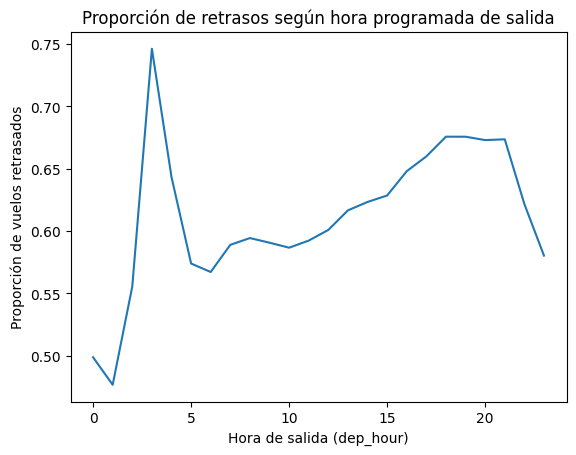

In [ ]:
#Gráfico proporción de retrasos según hora programada de salida
delay_by_hour = (
    df.groupby("dep_hour")["is_delayed"]
    .mean()
)

plt.figure()
plt.plot(delay_by_hour.index, delay_by_hour.values)
plt.xlabel("Hora de salida (dep_hour)")
plt.ylabel("Proporción de vuelos retrasados")
plt.title("Proporción de retrasos según hora programada de salida")
plt.show()

####Interpretación
La probabilidad de retraso aumenta a medida que avanza el día.
Durante la madrugada (00–02 h) la proporción de vuelos retrasados es menor y relativamente estable. A partir de la mañana temprana comienza una tendencia creciente que se mantiene durante toda la jornada, alcanzando sus valores más altos en la franja de la tarde y noche (17–21 h).

Este patrón es consistente con el efecto acumulativo de retrasos operacionales: demoras tempranas se propagan a lo largo del día por rotación de aeronaves, tripulaciones y congestión aeroportuaria.

Por lo tanto, la hora programada de salida (dep_hour) es una variable predictiva relevante y justifica plenamente su inclusión en el modelo.

###Día de la semana (DayOfWeek)

Representa el día de la semana en que está programado el vuelo (1 = lunes, 7 = domingo). Captura patrones operativos y de demanda que pueden influir en la puntualidad, como tráfico laboral, turismo o saturación de aeropuertos.

####Hipótesis
La probabilidad de retraso no es uniforme a lo largo de la semana.
Días con mayor demanda (laborales o fines de semana) podrían presentar mayores tasas de retraso.

####Objetivo del análisis

Evaluar si existen diferencias sistemáticas en la proporción de vuelos retrasados según el día de la semana y determinar si DayOfWeek aporta señal predictiva al modelo.

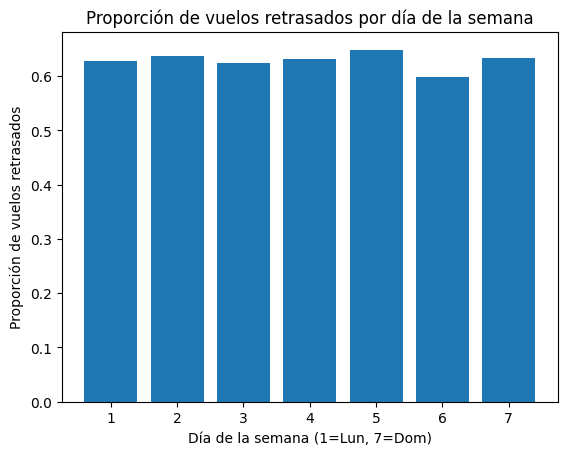

In [ ]:
#Gráfico proporción de vuelos retrasados por día de la semana
delay_by_day = (
    df.groupby("DayOfWeek")["is_delayed"]
      .mean()
)

plt.figure()
plt.bar(delay_by_day.index, delay_by_day.values)
plt.xlabel("Día de la semana (1=Lun, 7=Dom)")
plt.ylabel("Proporción de vuelos retrasados")
plt.title("Proporción de vuelos retrasados por día de la semana")
plt.show()


####Interpretación
La proporción de vuelos retrasados se mantiene relativamente estable durante la semana, con valores cercanos al 63 %.

Se observa un leve aumento hacia el viernes (día 5), lo que puede estar asociado a mayor demanda y congestión previa al fin de semana.

El sábado (día 6) presenta la menor tasa de retrasos, posiblemente debido a una operación más liviana y menor tráfico corporativo.

En general, aunque las diferencias no son extremas, DayOfWeek aporta señal contextual útil y complementa otras variables temporales como la hora de salida, por lo que se justifica su inclusión en el modelo.

###Distancia del vuelo (Distance)

Corresponde a la distancia en millas entre el aeropuerto de origen y destino. Es una variable numérica continua que puede reflejar diferencias operativas entre vuelos cortos, medianos y largos.

####Hipótesis

Los vuelos de mayor distancia podrían tener mayor probabilidad de retraso, ya sea por mayor exposición a condiciones meteorológicas, complejidad operacional o acumulación de demoras previas.

####Objetivo del análisis

Analizar la relación entre la distancia del vuelo y la probabilidad de retraso, identificando si existen patrones claros que justifiquen su uso como variable predictiva.

/tmp/ipython-input-1854332954.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("distance_bin")["is_delayed"]


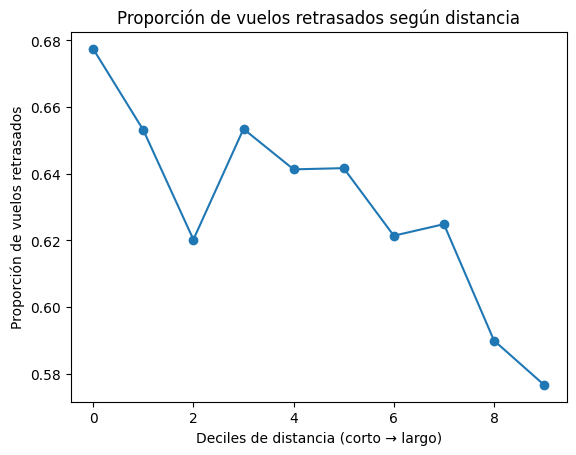

In [ ]:
# Bins para agrupar distancia (deciles)
df["distance_bin"] = pd.qcut(df["Distance"], q=10)

delay_by_distance = (
    df.groupby("distance_bin")["is_delayed"]
      .mean()
)

plt.figure()
plt.plot(range(len(delay_by_distance)), delay_by_distance.values, marker='o')
plt.xlabel("Deciles de distancia (corto → largo)")
plt.ylabel("Proporción de vuelos retrasados")
plt.title("Proporción de vuelos retrasados según distancia")
plt.show()


####Interpretación

La probabilidad de retraso muestra variaciones moderadas a lo largo del rango de distancias, sin una relación estrictamente lineal.

Esto sugiere que la distancia por sí sola no determina el retraso, pero captura diferencias operativas relevantes entre tipos de vuelo.

En combinación con variables temporales y categóricas (aerolínea, aeropuerto, hora), Distance aporta información útil al modelo, por lo que se mantiene como feature del MVP.

###Aerolínea (UniqueCarrier)

Identifica la aerolínea operadora del vuelo. Cada aerolínea tiene prácticas operativas, flotas, hubs y niveles de eficiencia distintos, lo que puede impactar directamente en la puntualidad.

####Hipótesis

Existen diferencias significativas en la probabilidad de retraso entre aerolíneas, debido a factores operativos propios de cada una.

####Objetivo del análisis

Evaluar si la aerolínea es un factor diferenciador en la tasa de retrasos y confirmar su relevancia como variable categórica en el modelo predictivo.

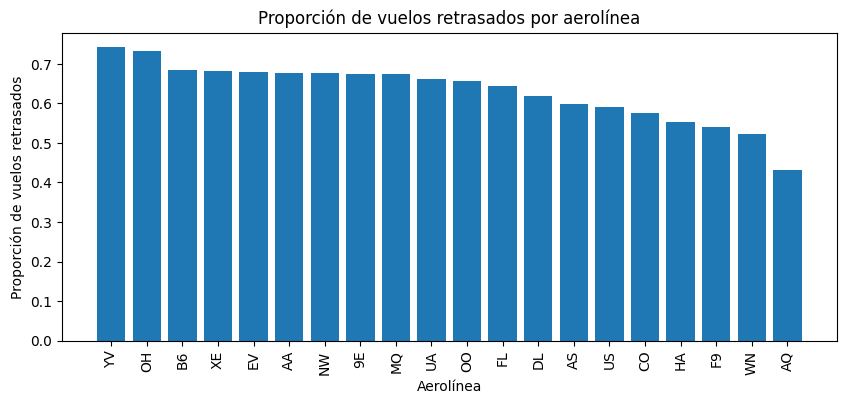

In [ ]:
#Gráfico proporción de vuelos retrasados por aerolínea
delay_by_carrier = (
    df.groupby("UniqueCarrier")["is_delayed"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 4))
plt.bar(delay_by_carrier.index, delay_by_carrier.values)
plt.xlabel("Aerolínea")
plt.ylabel("Proporción de vuelos retrasados")
plt.title("Proporción de vuelos retrasados por aerolínea")
plt.xticks(rotation=90)
plt.show()


####Interpretación

La tasa de retrasos varía significativamente entre aerolíneas, con diferencias superiores a 30 puntos porcentuales entre la aerolínea con mayor y menor proporción de vuelos retrasados.

Aerolíneas como YV y OH presentan los niveles más altos de retraso, mientras que AQ y WN muestran una operación considerablemente más puntual.

Estas diferencias reflejan estrategias operativas, estructura de hubs, tipo de rutas y gestión de flota propias de cada aerolínea.

El resultado confirma que UniqueCarrier es una de las variables más influyentes del modelo, aportando una señal fuerte y diferenciadora para la predicción de retrasos.

###Aeropuerto de origen (Origin)

Identifica el aeropuerto desde el cual despega el vuelo. Cada aeropuerto tiene distintos niveles de congestión, clima habitual, infraestructura y eficiencia operativa, lo que impacta directamente en la puntualidad.

####Hipótesis

Existen aeropuertos con mayor propensión a retrasos debido a congestión, condiciones meteorológicas recurrentes o limitaciones operativas.

####Objetivo del análisis

Evaluar si el aeropuerto de origen influye en la probabilidad de retraso y confirmar su utilidad como variable categórica para el modelo.

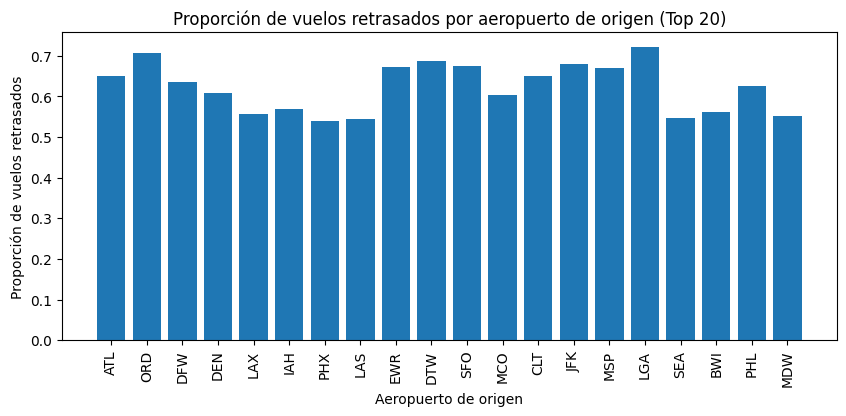

In [ ]:
#Gráfico proporción de vuelos retrasados por aeropuerto de origen (Top 20)
delay_by_origin = (
    df.groupby("Origin")["is_delayed"]
      .mean()
      .sort_values(ascending=False)
)

#20 aeropuertos con mayor volumen
top_origins = df["Origin"].value_counts().head(20).index
delay_top_origins = delay_by_origin.loc[top_origins]

plt.figure(figsize=(10, 4))
plt.bar(delay_top_origins.index, delay_top_origins.values)
plt.xlabel("Aeropuerto de origen")
plt.ylabel("Proporción de vuelos retrasados")
plt.title("Proporción de vuelos retrasados por aeropuerto de origen (Top 20)")
plt.xticks(rotation=90)
plt.show()


####Interpretación

La probabilidad de retraso varía de forma extrema entre aeropuertos de origen, con valores que van desde 0 % hasta 100 %.

Sin embargo, estos valores extremos se concentran principalmente en aeropuertos con muy bajo volumen de vuelos, donde pocos registros pueden distorsionar la proporción.

Aun considerando esta limitación, el análisis confirma que el aeropuerto de origen introduce una fuerte heterogeneidad operacional, influida por factores como infraestructura, clima local y nivel de tráfico.

Por este motivo, Origin es una variable informativa, pero su impacto debe ser interpretado con cautela y correctamente regularizado mediante One-Hot Encoding dentro del modelo.

###Aeropuerto de destino (Dest)

Identifica el aeropuerto de destino del vuelo. Aunque el retraso se define en la llegada, el aeropuerto de destino puede influir indirectamente en la puntualidad debido a congestión, clima local o restricciones operativas.

####Hipótesis

Existen aeropuertos de destino que concentran mayores tasas de retraso, especialmente aquellos con alta congestión o condiciones climáticas adversas.

####Objetivo del análisis

Analizar si el aeropuerto de destino muestra patrones diferenciados en la probabilidad de retraso y validar su inclusión como variable predictiva en el modelo.

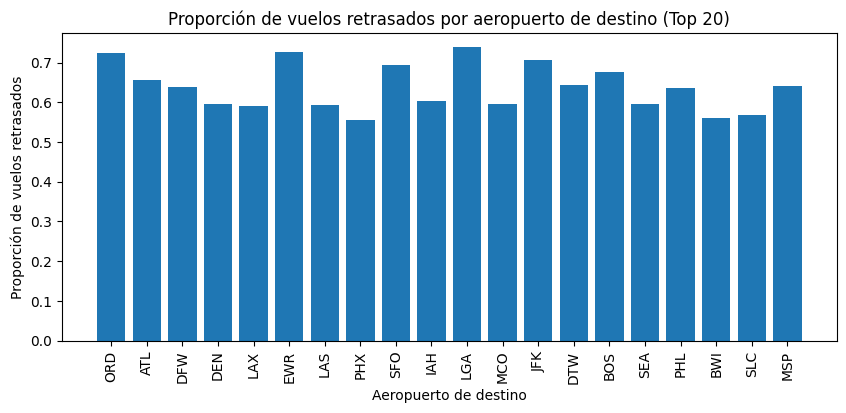

In [ ]:
#Gráfico proporción de vuelos retrasados por aeropuerto de destino (Top 20)
delay_by_dest = (
    df.groupby("Dest")["is_delayed"]
      .mean()
      .sort_values(ascending=False)
)

#20 aeropuertos con mayor volumen
top_dests = df["Dest"].value_counts().head(20).index
delay_top_dests = delay_by_dest.loc[top_dests]

plt.figure(figsize=(10, 4))
plt.bar(delay_top_dests.index, delay_top_dests.values)
plt.xlabel("Aeropuerto de destino")
plt.ylabel("Proporción de vuelos retrasados")
plt.title("Proporción de vuelos retrasados por aeropuerto de destino (Top 20)")
plt.xticks(rotation=90)
plt.show()


####Interpretación

La proporción de vuelos retrasados presenta una alta variabilidad entre aeropuertos de destino, con valores que van desde 0 % hasta 100 %.

Al igual que en el análisis del aeropuerto de origen, los valores extremos se concentran principalmente en destinos con bajo volumen de vuelos, donde pocos registros amplifican la proporción.

Aun así, el resultado confirma que el aeropuerto de destino refleja condiciones operativas y de congestión relevantes, que influyen en la probabilidad de retraso.

En conjunto con Origin y UniqueCarrier, la variable Dest aporta contexto operacional complementario, reforzando la capacidad predictiva del modelo cuando se codifica adecuadamente.

In [ ]:
delay_by_dest

,is_delayed
Dest,
INL,1.000000
OTH,0.855856
TEX,0.833333
SPI,0.831202
ITH,0.812500
...,...
GST,0.456522
IYK,0.411290
PIR,0.333333


#**RESUMEN** — ANÁLISIS EXPLORATORIO (EDA)

El análisis exploratorio se realizó sobre un conjunto de datos de más de 1,9 millones de vuelos, tras la eliminación de valores nulos no informativos y la depuración de vuelos duplicados, definidos mediante una combinación de variables temporales, operacionales y de ruta.

###**Variable objetivo: is_delayed**

La variable objetivo presenta un desbalance moderado, con aproximadamente un 63 % de vuelos retrasados frente a un 37 % sin retraso.
Este desbalance es relevante para las etapas posteriores de modelado y deberá ser considerado al seleccionar métricas de evaluación.

El análisis de los minutos de retraso confirma una asimetría marcada:

Los vuelos no retrasados muestran valores cercanos a cero, incluso con adelantos.

Los vuelos retrasados presentan una cola larga, con retrasos severos que superan ampliamente la mediana.

###Principales hallazgos por variable

####Variables temporales

Hora de salida (dep_hour)
Existe una tendencia creciente en la probabilidad de retraso a lo largo del día, alcanzando su punto más alto en la tarde-noche. Esto sugiere un efecto de acumulación de demoras operativas.

Día de la semana (DayOfWeek)
La probabilidad de retraso es relativamente estable, aunque se observan ligeras diferencias, con mayor incidencia hacia el final de la semana laboral.

####Variables operacionales

Aerolínea (UniqueCarrier)
Se detectan diferencias significativas entre compañías, reflejando distintos niveles de eficiencia operativa. Esta variable resulta altamente informativa para el modelo.

####Variables espaciales

Aeropuerto de origen (Origin)
La proporción de retrasos varía ampliamente entre aeropuertos. Los valores extremos se concentran en aeropuertos con bajo volumen, mientras que aeropuertos grandes muestran comportamientos más estables.

Aeropuerto de destino (Dest)
Presenta un patrón similar al de origen, aportando información complementaria sobre congestión, infraestructura y condiciones locales.

#CONCLUSIONES DEL EDA

El retraso de vuelos es un fenómeno multifactorial, donde variables temporales, operacionales y espaciales aportan información relevante.

Existen patrones claros y consistentes que justifican la incorporación de estas variables en el modelo predictivo.

Varias variables categóricas presentan alta cardinalidad, lo que motiva decisiones específicas en Feature Engineering (codificación, agregaciones o target encoding).

El EDA respalda la transición hacia la etapa de ingeniería de características, enfocada en maximizar señal y controlar ruido.